In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

with open(r"C:\Users\golds\Desktop\Vectorial Encodings\all_identities_by_sheet.txt", encoding='utf-8') as f1:
    texts1 = [line.strip() for line in f1 if line.strip()]
with open(r"C:\Users\golds\Desktop\Vectorial Encodings\random_news_500.txt", encoding='utf-8') as f2:
    texts2 = [line.strip() for line in f2 if line.strip()]


X1 = np.load(r'C:\Users\golds\Desktop\Vectorial Encodings\all_identities_by_sheet.npy')  # shape = (N1, D)
X2 = np.load(r'C:\Users\golds\Desktop\Vectorial Encodings\X_bert.npy')  # shape = (N2, D)


sim = cosine_similarity(X1, X2)  # (N1, N2)

top_k = 3
rows = []
for i, s in enumerate(sim):

    idxs = np.argsort(s)[-top_k:][::-1]
    for rank, j in enumerate(idxs, 1):
        rows.append({
            'Text1_Index': i,
            'Text1': texts1[i],
            f'Text2_Top{rank}_Index': j,
            f'Text2_Top{rank}': texts2[j],
            f'Score{rank}': round(s[j], 4)
        })


df = pd.DataFrame(rows).set_index('Text1_Index')
df = df.groupby(level=0).agg(lambda x: ' | '.join(x.values.astype(str)))
df = df.reset_index(drop=True)


print(df.head(10))
df.to_excel(r'C:\Users\golds\Desktop\Vectorial Encodings\matching_table.xlsx', index=False)


                                               Text1   Text2_Top1_Index  \
0  Sheet: 《Philoktetes》 | Sheet: 《Philoktetes》 | ...   67.0 | nan | nan   
1  A Greek hero, the wielder of Heracles' sacred ...  423.0 | nan | nan   
2  The son of Achilles, tasked with traveling to ...  251.0 | nan | nan   
3  The cunning king of Ithaca, representing the G...   41.0 | nan | nan   
4  The mythic hero, appearing as a deity at the e...  119.0 | nan | nan   
5  Composed of the sailor attendants of Neoptolem...  454.0 | nan | nan   
6  Sent by Odysseus, providing Neoptolemus with c...  260.0 | nan | nan   
7  Sheet: 《The Clouds》 | Sheet: 《The Clouds》 | Sh...   84.0 | nan | nan   
8  The protagonist, an Athenian citizen, seeking ...  119.0 | nan | nan   
9  The son of Strepsiades, obsessed with horse ra...  395.0 | nan | nan   

                                          Text2_Top1  \
0  metro expansion berlin records heatwave | nan ...   
1  startup scene  celebrity spotted at cafe | nan...   
2     

C:\Users\golds\AppData\Local\Temp\ipykernel_44340\42869271.py:22: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_44340\42869271.py:22: UserWarning: Glyph 12299 (\N{RIGHT DOUBLE ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_44340\42869271.py:22: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_44340\42869271.py:22: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_44340\42869271.py:22: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_44340\42869271.py:22: UserWarning: Glyph 30340 (\N{CJK UNIFIED

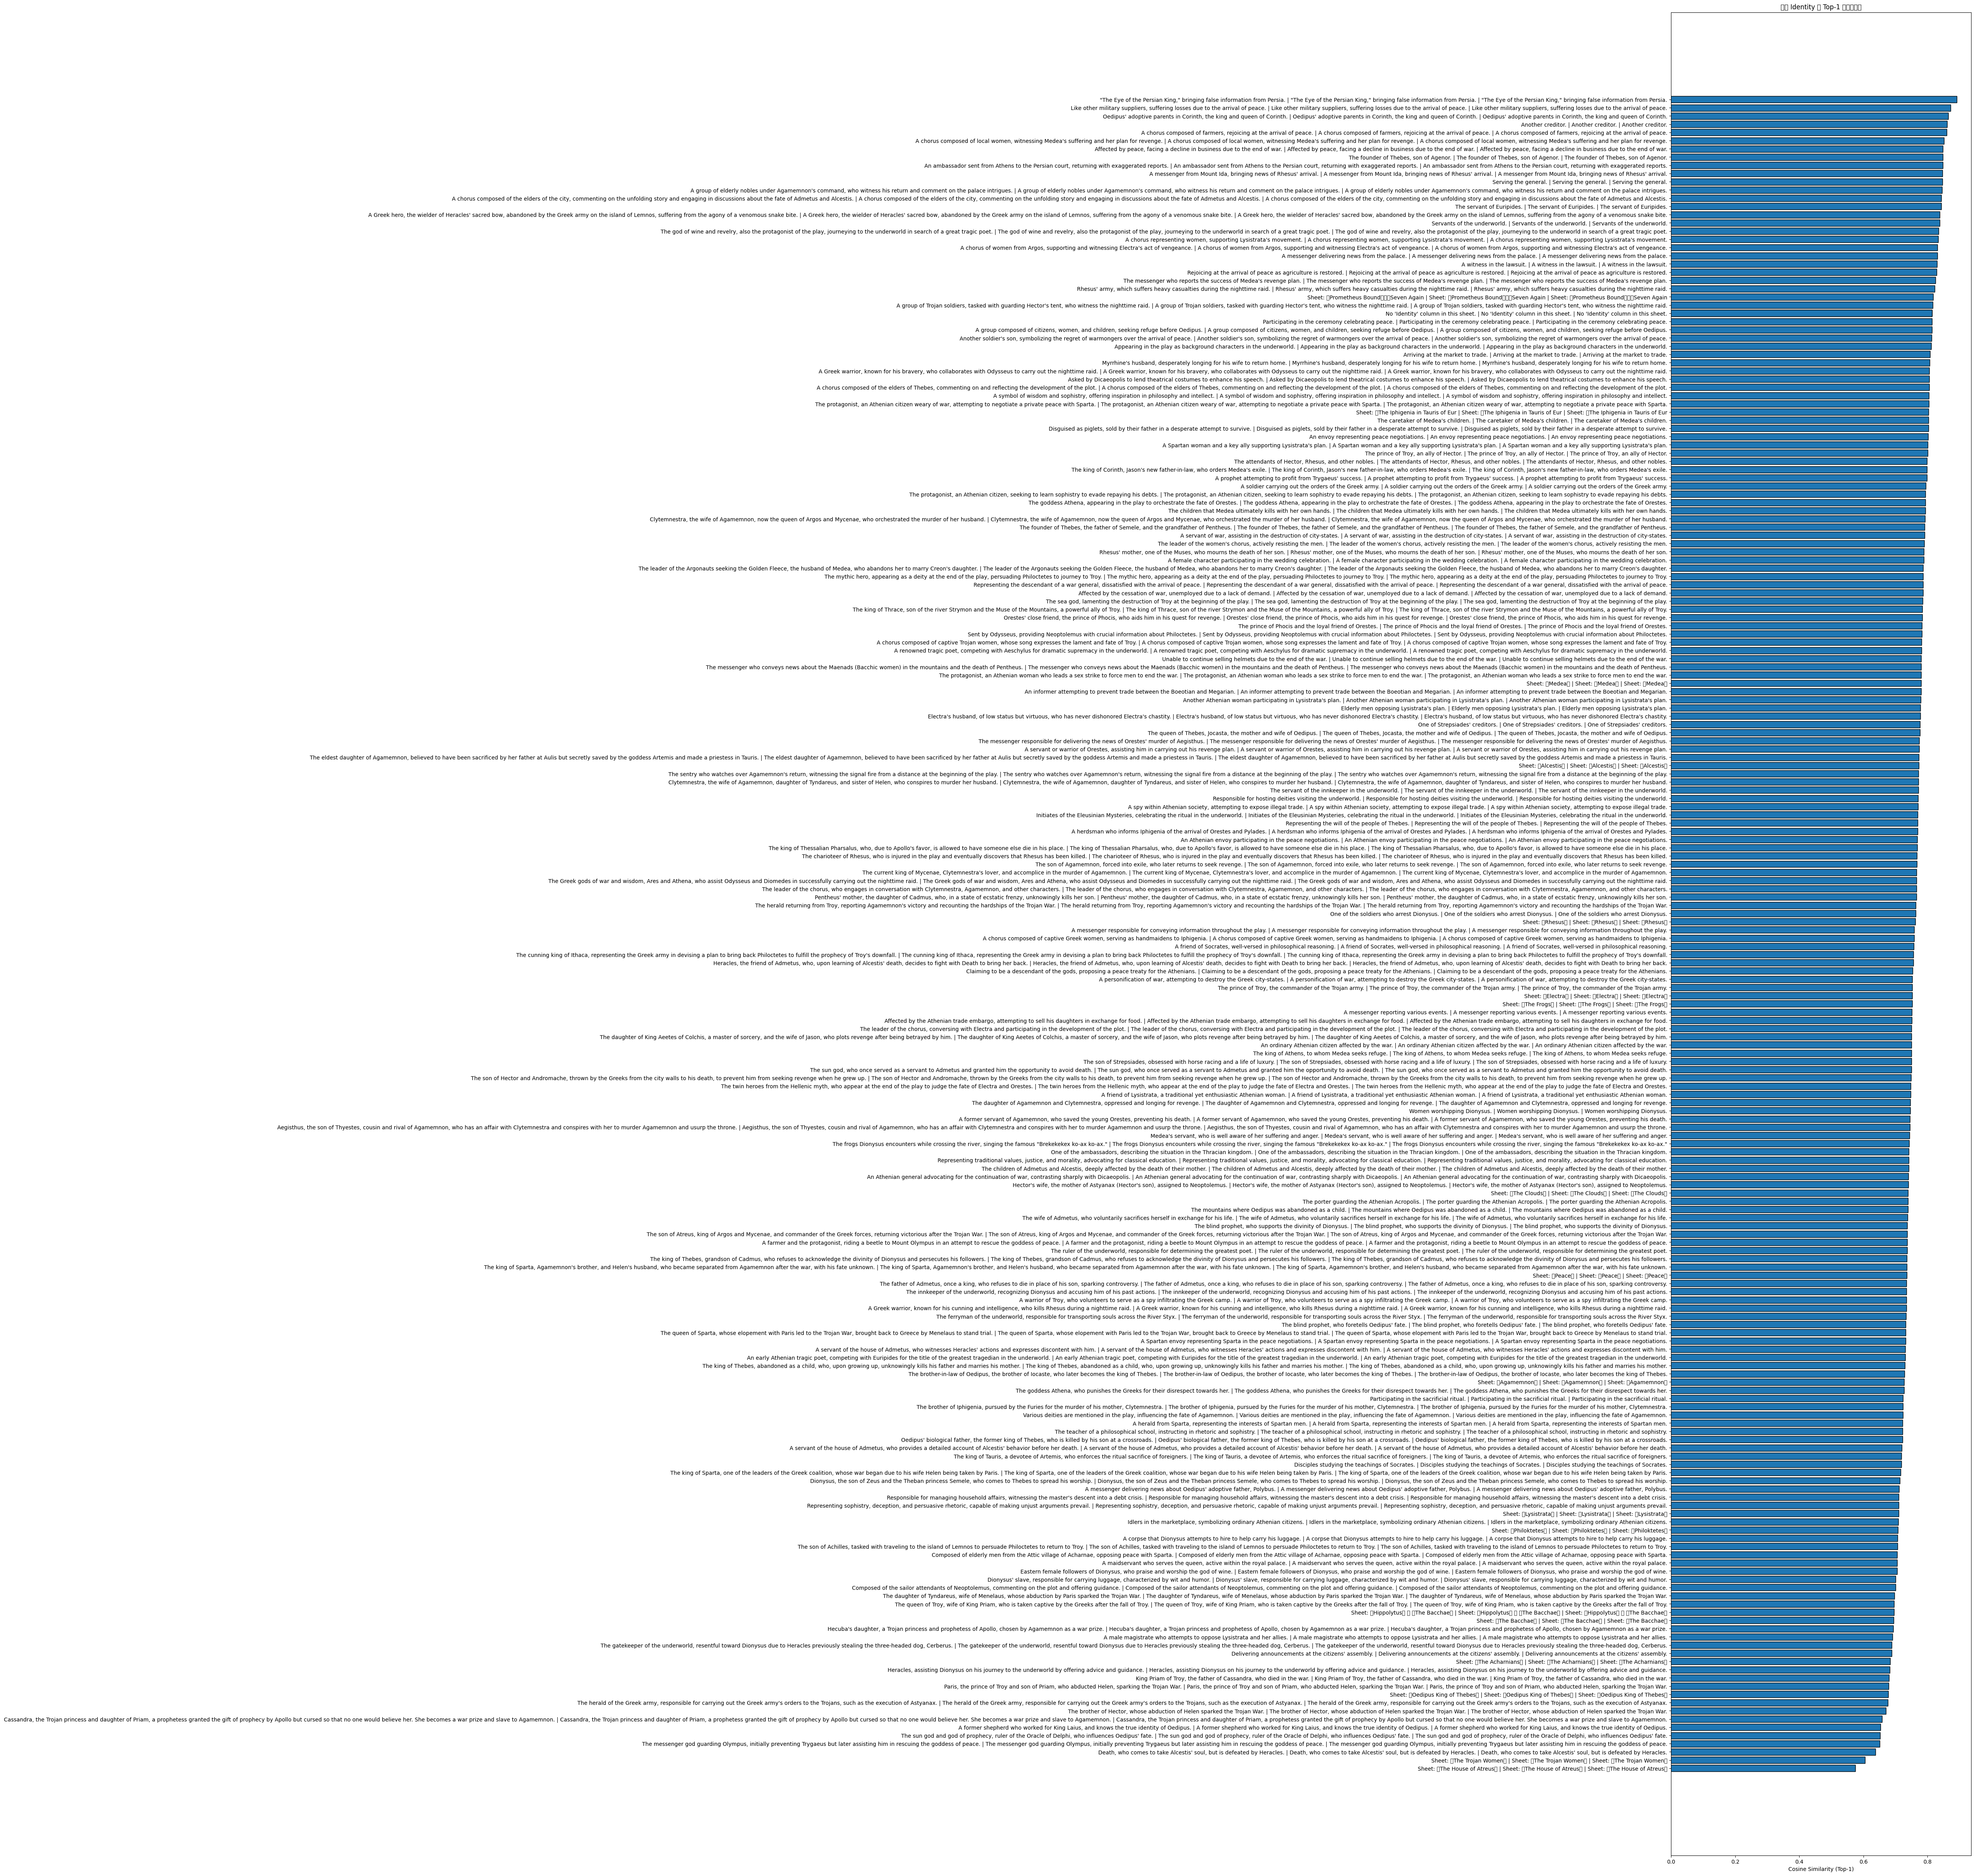

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\golds\Desktop\作业julian\matching_table.xlsx')

def parse_score(s):

    return float(s.split('|')[0].strip())

df['Score1_num'] = df['Score1'].apply(parse_score)


df_plot = df[['Text1', 'Score1_num']].sort_values('Score1_num', ascending=True)


plt.figure(figsize=(10, max(6, 0.3 * len(df_plot))))
plt.barh(df_plot['Text1'], df_plot['Score1_num'], edgecolor='black')
plt.xlabel('Cosine Similarity (Top-1)')
plt.title('each Identity Top-1 similarity')
plt.tight_layout()
plt.show()
